In [218]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

In [219]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [220]:
len(x_train)

60000

In [222]:
len(x_test)

10000

In [223]:
x_train.shape

(60000, 28, 28)

In [224]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [225]:
x_train = x_train / 255
x_test = x_test / 255

In [227]:
x_train_flattened = x_train.reshape(len(x_train), (28*28))
x_test_flattened = x_test.reshape(len(x_test), (28*28))

In [228]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')])

In [230]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [232]:
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4640 - accuracy: 0.8806
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3027 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9260


In [233]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


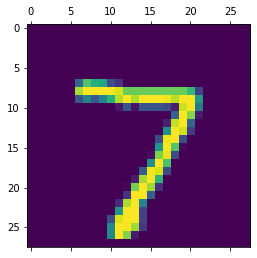

In [235]:
plt.matshow(x_test[0])

In [236]:
y_predicted[0]

array([2.13801656e-02, 2.85223109e-07, 5.64018413e-02, 9.52013850e-01,
       2.49040616e-03, 1.12808265e-01, 1.96232941e-06, 9.99819279e-01,
       1.07689187e-01, 6.76005840e-01], dtype=float32)

In [237]:
np.argmax(y_predicted[0])

7

In [238]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [239]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    2,    0,    0,    3,    1,    2,    0],
       [   0, 1122,    6,    1,    0,    1,    2,    0,    3,    0],
       [   7,    1,  997,    2,    3,    0,    4,    6,   10,    2],
       [   2,    0,    4,  989,    0,    1,    0,    4,    4,    6],
       [   1,    0,    3,    1,  955,    0,    3,    1,    2,   16],
       [   5,    0,    0,   14,    2,  855,    8,    0,    6,    2],
       [   6,    2,    0,    0,    3,    3,  942,    0,    2,    0],
       [   2,    4,    9,    8,    0,    0,    0,  993,    3,    9],
       [   9,    0,    3,    3,    4,    1,    2,    3,  943,    6],
       [   4,    4,    0,    5,    6,    2,    1,    2,    3,  982]])>

In [240]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

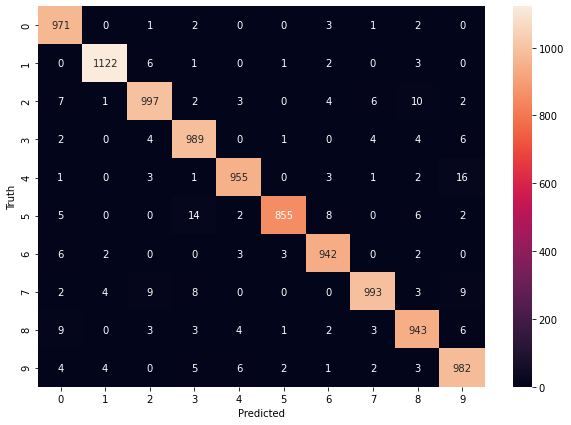

In [243]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [244]:
model = keras.Sequential([keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
                         keras.layers.Dense(10, activation = 'sigmoid')])

In [246]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9835


In [249]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [262]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

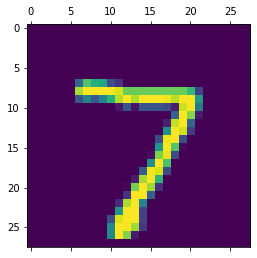

In [263]:
plt.matshow(x_test[0])

In [264]:
np.argmax(y_predicted[0])


7

In [265]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]